# Estimation of COVID-19 Pandemic

## Loading Data

We will use data on COVID-19 infected individuals, provided by the [Center for Systems Science and Engineering](https://systems.jhu.edu/) (CSSE) at [Johns Hopkins University](https://jhu.edu/). Dataset is available in [this GitHub Repository](https://github.com/CSSEGISandData/COVID-19).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,3) # make figures larger

We can load the most recent data directly from GitHub using `pd.read_csv`. If for some reason the data is not available, you can always use the copy available locally in the `data` folder - just uncomment the line below that defines `base_url`:

In [2]:
base_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/" # loading from Internet
# base_url = "../../../data/covidspread/" # loading from disk (have not tested this way yet)
infected_dataset_url = base_url + "time_series_covid19_confirmed_global.csv"
recovered_dataset_url = base_url + "time_series_covid19_recovered_global.csv"
deaths_dataset_url = base_url + "time_series_covid19_deaths_global.csv"
countries_dataset_url = base_url + "../UID_ISO_FIPS_LookUp_Table.csv"

Let's now load the data for infected individuals and see how the data looks like:

In [3]:
infected = pd.read_csv(infected_dataset_url)
infected.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288


We can see that each row of the table defines the number of infected individuals for each country and/or province, and columns correspond to dates. Similar tables can be loaded for other data, such as number of recovered and number of deaths.

In [4]:
recovered = pd.read_csv(recovered_dataset_url)
recovered.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
deaths = pd.read_csv(deaths_dataset_url)
deaths.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,7896,7896,7896,7896,7896,7896,7896,7896,7896,7896
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,3598,3598,3598,3598,3598,3598,3598,3598,3598,3598
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,6881,6881,6881,6881,6881,6881,6881,6881,6881,6881
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,165,165,165,165,165,165,165,165,165,165
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1933,1933,1933,1933,1933,1933,1933,1933,1933,1933


## Making Sense of the Data

From the table above the role of province column is not clear. Let's see the different values that are present in `Province/State` column:

In [6]:
infected['Province/State'].value_counts()

Province/State
Australian Capital Territory    1
Saint Pierre and Miquelon       1
Reunion                         1
New Caledonia                   1
Mayotte                         1
                               ..
Gansu                           1
Fujian                          1
Chongqing                       1
Beijing                         1
Turks and Caicos Islands        1
Name: count, Length: 91, dtype: int64

From the names we can deduce that countries like Australia and China have more detailed breakdown by provinces. Let's look for information on China to see the example:
And then I changed it to Canada because I'm curious:

In [7]:
infected[infected['Country/Region']=='Canada']

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
40,Alberta,Canada,53.9333,-116.5765,0,0,0,0,0,0,...,628572,628947,628947,628947,628947,628947,628947,628947,629269,629269
41,British Columbia,Canada,53.7267,-127.6476,0,0,0,0,0,0,...,396066,396066,396472,396472,396472,396472,396472,396472,396472,396817
42,Diamond Princess,Canada,0.0000,0.0000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
43,Grand Princess,Canada,0.0000,0.0000,0,0,0,0,0,0,...,13,13,13,13,13,13,13,13,13,13
44,Manitoba,Canada,53.7609,-98.8139,0,0,0,0,0,0,...,154588,154588,154588,154588,154588,154588,154712,154712,154712,154712
45,New Brunswick,Canada,46.5653,-66.4619,0,0,0,0,0,0,...,88503,88503,88503,88503,88503,88503,88866,88866,88866,88866
46,Newfoundland and Labrador,Canada,53.1355,-57.6604,0,0,0,0,0,0,...,54583,54583,54583,54583,54583,54583,54757,54757,54757,54757
47,Northwest Territories,Canada,64.8255,-124.8457,0,0,0,0,0,0,...,11511,11511,11511,11511,11511,11511,11511,11511,11511,11511
48,Nova Scotia,Canada,44.6820,-63.7443,0,0,0,0,0,0,...,140492,140492,140492,140492,140492,140492,140793,140793,140793,140793
49,Nunavut,Canada,70.2998,-83.1076,0,0,0,0,0,0,...,3531,3531,3531,3531,3531,3531,3531,3531,3531,3531


## Pre-processing the Data 

We are not interested in breaking countries down to further territories, thus we would first get rid of this breakdown and add information on all territories together, to get info for the whole country. This can be done using `groupby`:

In [8]:
infected = infected.groupby('Country/Region').sum()
recovered = recovered.groupby('Country/Region').sum()
deaths = deaths.groupby('Country/Region').sum()

# checked for all three info types
infected.head()
#recovered.head()
#deaths.head()

,Province/State,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,33.93911,67.709953,0,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
Albania,0,41.15330,20.168300,0,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
Algeria,0,28.03390,1.659600,0,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
Andorra,0,42.50630,1.521800,0,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
Angola,0,-11.20270,17.873900,0,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288


You can see that due to using `groupby` all DataFrames are now indexed by Country/Region. We can thus access the data for a specific country by using `.loc`:|

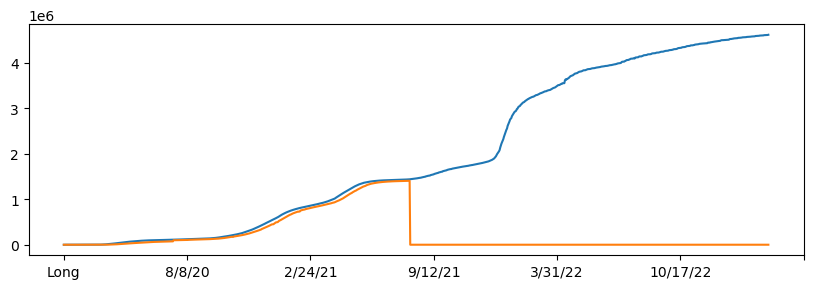

In [9]:
infected.loc['Canada'][2:].plot()
recovered.loc['Canada'][2:].plot()
plt.show()

> **Note** how we use `[2:]` to remove first two elements of a sequence that contain geolocation of a country. We can also drop those two columns altogether:

In [10]:
infected.drop(columns=['Lat','Long'],inplace=True)
recovered.drop(columns=['Lat','Long'],inplace=True)
deaths.drop(columns=['Lat','Long'],inplace=True)

## Investigating the Data

Let's now switch to investigating a specific country. Let's create a frame that contains the data on infections indexed by date:

In [11]:
# testing code for df.index for creating frame part
#infected.iloc[0][1:]
infected.columns[1:].values # both with and without .values works
# starting from 1 because element 0 is province/state and lat and long
#were dropped previously

array(['1/22/20', '1/23/20', '1/24/20', ..., '3/7/23', '3/8/23', '3/9/23'],
      dtype=object)

In [12]:
# see what df.index is
df = pd.DataFrame({ 'infected' : infected.loc['US'][1:] ,
                    'recovered' : recovered.loc['US'][1:],
                    'deaths' : deaths.loc['US'][1:]})
df.index

Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20',
       ...
       '2/28/23', '3/1/23', '3/2/23', '3/3/23', '3/4/23', '3/5/23', '3/6/23',
       '3/7/23', '3/8/23', '3/9/23'],
      dtype='object', length=1143)

In [13]:
# testing code for if df will have the right info for creating frame part
infected.loc['US'][1:]

1/22/20            1
1/23/20            1
1/24/20            2
1/25/20            2
1/26/20            5
             ...    
3/5/23     103646975
3/6/23     103655539
3/7/23     103690910
3/8/23     103755771
3/9/23     103802702
Name: US, Length: 1143, dtype: object

In [14]:
def mkframe(country):
    df = pd.DataFrame({ 'infected' : infected.loc[country][1:] ,
                        'recovered' : recovered.loc[country][1:],
                        'deaths' : deaths.loc[country][1:]})
    df.index = pd.to_datetime(df.index, format="%m/%d/%y") 
    return df

df = mkframe('US')
df

# to be clear (though you can figure this out in the first row, order in the 
#given table is year-month-day

,infected,recovered,deaths
2020-01-22,1,0,0
2020-01-23,1,0,0
2020-01-24,2,0,0
2020-01-25,2,0,0
2020-01-26,5,0,0
...,...,...,...
2023-03-05,103646975,0,1122134
2023-03-06,103655539,0,1122181
2023-03-07,103690910,0,1122516
2023-03-08,103755771,0,1123246


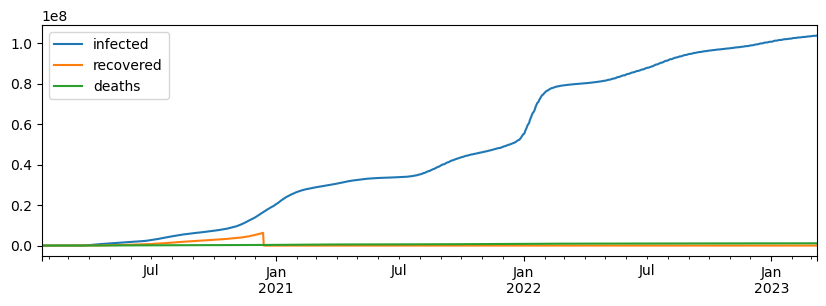

In [15]:
df.plot()
plt.show()

Now let's compute the number of new infected people each day. This will allow us to see the speed at which pandemic progresses. The easiest day to do it is to use `diff`:
which from the [docs](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.diff.html?highlight=diff#pandas.DataFrame.diff) "Calculates the difference of a DataFrame element compared with another element in the DataFrame (default is element in previous row)."

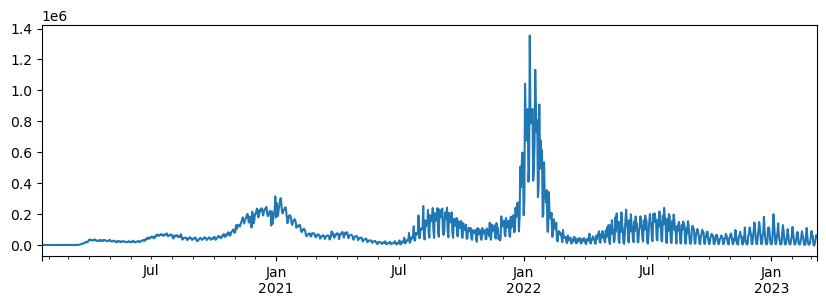

In [16]:
df['ninfected'] = df['infected'].diff()
df['ninfected'].plot()
plt.show()

We can see high fluctuations in data. Let's look closer at one of the months:

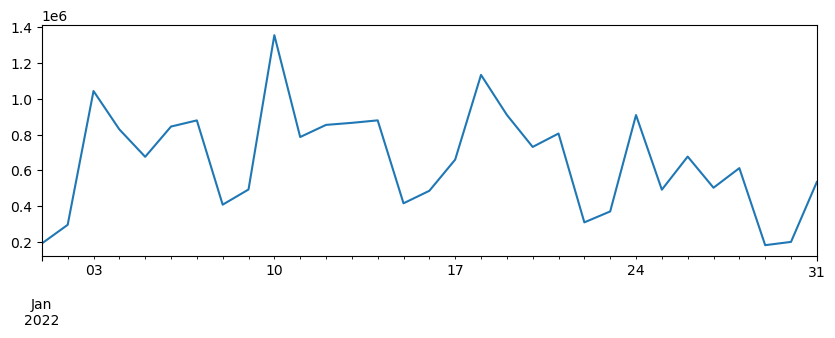

In [17]:
df[(df.index.year==2022) & (df.index.month==1)]['ninfected'].plot()
plt.show()

It clearly looks like there are weekly fluctuations in data. Because we want to be able to see the trends, it makes sense to smooth out the curve by computing running average (i.e. for each day we will compute the average value of the previous several days):

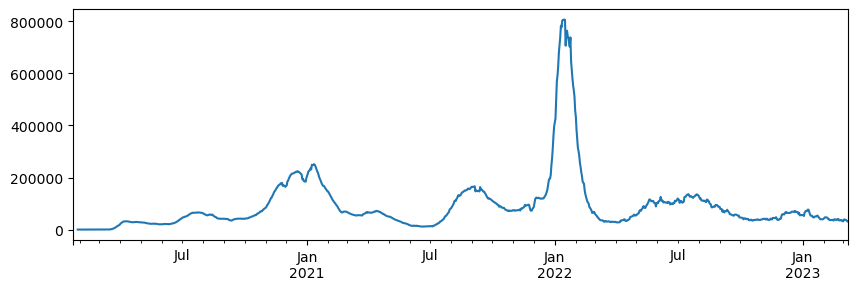

In [18]:
df['ninfav'] = df['ninfected'].rolling(window=7).mean()
df['ninfav'].plot()
plt.show()

In order to be able to compare several countries, we might want to take the country's population into account, and compare the percentage of infected individuals with respect to country's population. In order to get country's population, let's load the dataset of countries:

In [19]:
countries = pd.read_csv(countries_dataset_url)
countries

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Population
0,4,AF,AFG,4.0,NaN,NaN,NaN,Afghanistan,33.939110,67.709953,Afghanistan,38928341.0
1,8,AL,ALB,8.0,NaN,NaN,NaN,Albania,41.153300,20.168300,Albania,2877800.0
2,10,AQ,ATA,10.0,NaN,NaN,NaN,Antarctica,-71.949900,23.347000,Antarctica,NaN
3,12,DZ,DZA,12.0,NaN,NaN,NaN,Algeria,28.033900,1.659600,Algeria,43851043.0
4,20,AD,AND,20.0,NaN,NaN,NaN,Andorra,42.506300,1.521800,Andorra,77265.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4316,84056037,US,USA,840.0,56037.0,Sweetwater,Wyoming,US,41.659439,-108.882788,"Sweetwater, Wyoming, US",42343.0
4317,84056039,US,USA,840.0,56039.0,Teton,Wyoming,US,43.935225,-110.589080,"Teton, Wyoming, US",23464.0
4318,84056041,US,USA,840.0,56041.0,Uinta,Wyoming,US,41.287818,-110.547578,"Uinta, Wyoming, US",20226.0
4319,84056043,US,USA,840.0,56043.0,Washakie,Wyoming,US,43.904516,-107.680187,"Washakie, Wyoming, US",7805.0


Because this dataset contains information on both countries and provinces, to get the population of the whole country we need to be a little bit clever: 

Again according to the [docs](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isna.html?highlight=isna#pandas.DataFrame.isna) (which I'm not even sure I am looking at the right thing this time) `isna` detects missing values, which makes sense so things don't crash and burn

Reminder `&` is a boolean operator showing that both arguments are true.

In [20]:
countries[(countries['Country_Region']=='US') & countries['Province_State'].isna()]

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Population
915,840,US,USA,840.0,NaN,NaN,NaN,US,40.0,-100.0,US,329466283.0


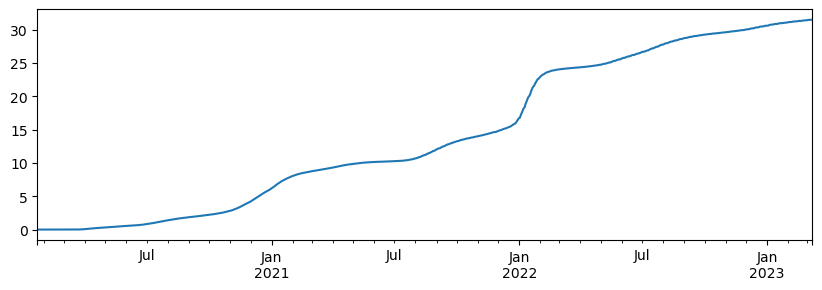

In [21]:
pop = countries[(countries['Country_Region']=='US') & countries['Province_State'].isna()]['Population'].iloc[0]
df['pinfected'] = df['infected']*100 / pop
df['pinfected'].plot(figsize=(10,3))
plt.show()


## Computing $R_t$

To see how infectious is the disease, we look at the **basic reproduction number** $R_0$, which indicated the number of people that an infected person would further infect. When $R_0$ is more than 1, the epidemic is likely to spread.

$R_0$ is a property of the disease itself, and does not take into account some protective measures that people may take to slow down the pandemic. During the pandemic progression, we can estimate the reproduction number $R_t$ at any given time $t$. It has been shown that this number can be roughly estimated by taking a window of 8 days, and computing $$R_t=\frac{I_{t-7}+I_{t-6}+I_{t-5}+I_{t-4}}{I_{t-3}+I_{t-2}+I_{t-1}+I_t}$$
where $I_t$ is the number of newly infected individuals on day $t$.

Let's compute $R_t$ for our pandemic data. To do this, we will take a rolling window of 8 `ninfected` values, and apply the function to compute the ratio above:

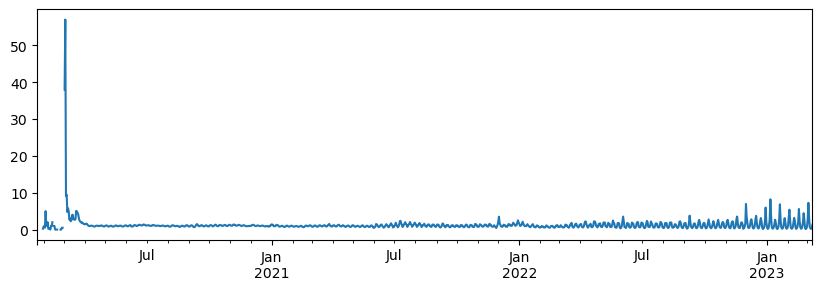

In [22]:
df['Rt'] = df['ninfected'].rolling(8).apply(lambda x: x[4:].sum()/x[:4].sum())
df['Rt'].plot()
plt.show()

You can see that there are some gaps in the graph. Those can be caused by either `NaN`, if  `inf` values being present in the dataset. `inf` may be caused by division by 0, and `NaN` can indicate missing data, or no data available to compute the result (like in the very beginning of our frame, where rolling window of width 8 is not yet available). To make the graph nicer, we need to fill those values using `replace` and `fillna` function.
  - `replace` [(docs)](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.replace.html?highlight=replace#pandas.DataFrame.replace) dynamically replaces values
  - `fillna` [(docs)](https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.DataFrameGroupBy.fillna.html?highlight=fillna#pandas.core.groupby.DataFrameGroupBy.fillna) fills Na/NaN values with specified methods within groups
I hope I looked at the right documentation.

Let's further look at the beginning of the pandemic. We will also limit the y-axis values to show only values below 6, in order to see better, and draw horizontal line at 1.

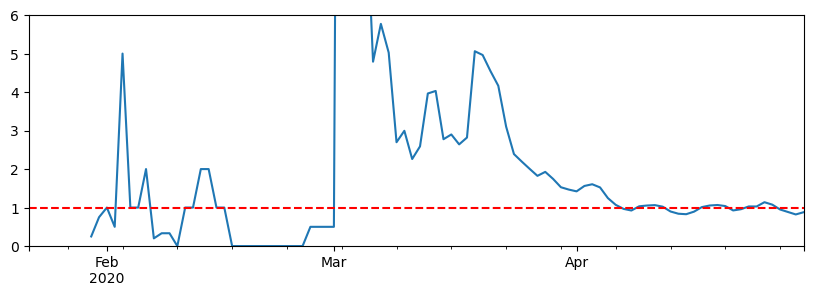

In [23]:
ax = df[df.index<"2020-05-01"]['Rt'].replace(np.inf,np.nan).fillna(method='pad').plot(figsize=(10,3))
ax.set_ylim([0,6])
ax.axhline(1,linestyle='--',color='red')
plt.show()

Another interesting indicator of the pandemic is the **derivative**, or **daily difference** in new cases. It allows us to see clearly when pandemic is increasing or declining. 

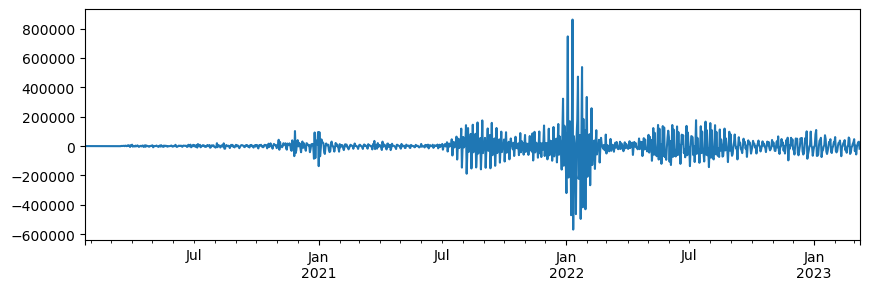

In [24]:
df['ninfected'].diff().plot()
plt.show()

Given the fact that there are a lot of fluctuations in data caused by reporting, it makes sense to smooth the curve by running rolling average to get the overall picture. Let's again focus on the first months of the pandemic:

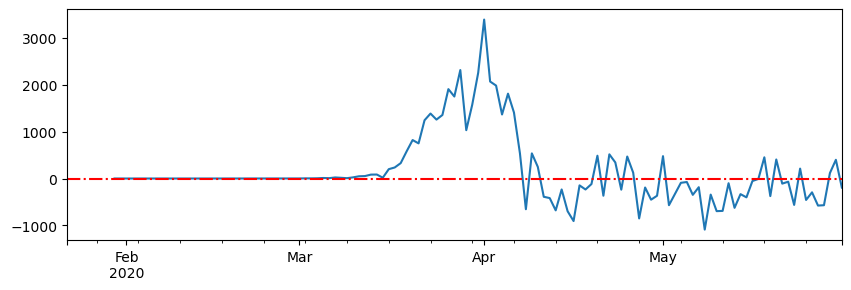

In [25]:
ax=df[df.index<"2020-06-01"]['ninfected'].diff().rolling(7).mean().plot()
ax.axhline(0,linestyle='-.',color='red')
plt.show()

but I also want to know what happened from July 2021 to July 2022 so I will also take a look at that

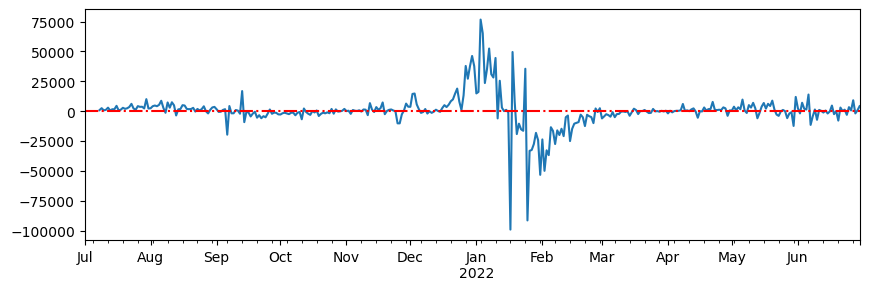

In [26]:
ax=df[(df.index>"2021-06-30") & (df.index<"2022-07-01")]['ninfected'].diff().rolling(7).mean().plot()
ax.axhline(0,linestyle='-.',color='red')
plt.show()


## Challenge

Now it is time for you to play more with the code and data! Here are a few suggestions you can experiment with:
* See the spread of the pandemic in different countries.
* Plot $R_t$ graphs for several countries on one plot for comparison, or make several plots side-by-side
* See how the number of deaths and recoveries correlate with number of infected cases.
* Try to find out how long a typical disease lasts by visually correlating infection rate and deaths rate and looking for some anomalies. You may need to look at different countries to find that out.
* Calculate the fatality rate and how it changes over time. You may want to take into account the length of the disease in days to shift one time series before doing calculations

#### Plot $R_t$ graphs for several countries on one plot for comparison
I'm just going to compare some countries from around the same area in Europe. Looking at Google Earth I'm choosing: UK, Ireland, France, Belgium, Netherlands, Germany, and Denmark.

So my idea is to make a dataframe similar for the one that made the infected, recovered, deaths graph, and then plot it from there.

Also I may change range of axes to make it more readable

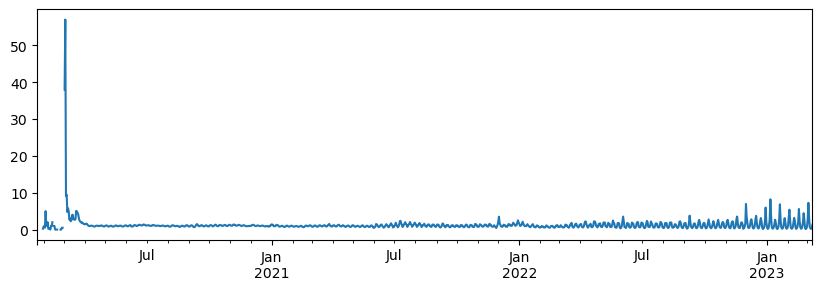

In [27]:
# original Rt graph
df['Rt'] = df['ninfected'].rolling(8).apply(lambda x: x[4:].sum()/x[:4].sum())
df['Rt'].plot()
plt.show()

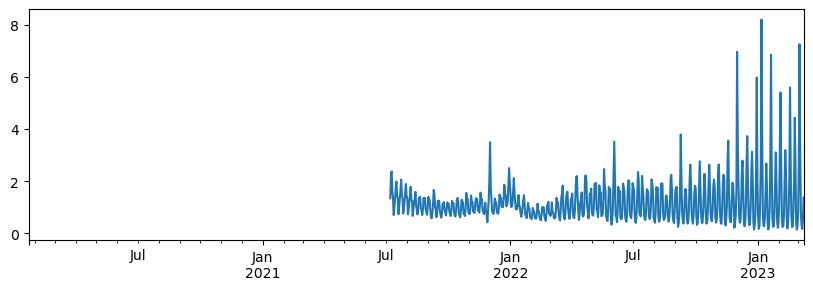

In [28]:
# altered range
df['Rt'] = df[df.index>"2021-06-30"]['ninfected'].rolling(8).apply(lambda x: x[4:].sum()/x[:4].sum())
df['Rt'].plot()
plt.show()

in this code
```python
df['Rt'] = df[df.index>"2021-06-30"]['ninfected'].rolling(8).apply(lambda x: x[4:].sum()/x[:4].sum())
```
to find $R_t$ you only need the date, the column 'ninfected' and a bunch of operations. Looking back at previous code, 'ninfected' is found by doing this:
```python
df['ninfected'] = df['infected'].diff()
```
so with this in mind, let's make a dataframe with the date as indeces, my specified countries as headers, and the content being Rt.


In [29]:
# remove Province/State column
infected.drop(columns=['Province/State'],inplace=True)
recovered.drop(columns=['Province/State'],inplace=True)
deaths.drop(columns=['Province/State'],inplace=True)
infected.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
Albania,0,0,0,0,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
Algeria,0,0,0,0,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
Andorra,0,0,0,0,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
Angola,0,0,0,0,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288


In [30]:
def mkRt(country):
    rt = infected.loc[country].diff().rolling(8).apply(lambda x:x[4:].sum()/x[:4].sum())
    return rt
# countries: UK, Ireland, France, Belgium, Netherlands, Germany, and Denmark
# I feel like there's a better way to do this but I'm not going to think about it for now
# nope it is still too cluttered on the graph I am switching to 4 countries
df_Rt = pd.DataFrame({ 'UK' : mkRt('United Kingdom'),
                       'Ireland' : mkRt('Ireland'),
                       'France' : mkRt('France'),
                       'Belgium' : mkRt('Belgium')})
                       #'Netherlands' : mkRt('Netherlands'),
                       #'Germany' : mkRt('Germany'),
                       #'Denmark' : mkRt('Denmark')})
df_Rt.index = pd.to_datetime(df_Rt.index, format="%m/%d/%y")

df_Rt

,UK,Ireland,France,Belgium
2020-01-22,NaN,NaN,NaN,NaN
2020-01-23,NaN,NaN,NaN,NaN
2020-01-24,NaN,NaN,NaN,NaN
2020-01-25,NaN,NaN,NaN,NaN
2020-01-26,NaN,NaN,NaN,NaN
...,...,...,...,...
2023-03-05,342.727273,0.000000,0.415122,inf
2023-03-06,0.000378,0.000000,0.515501,0.000000
2023-03-07,0.000227,0.000000,0.865820,0.000000
2023-03-08,0.003098,1.075908,1.789341,0.000000


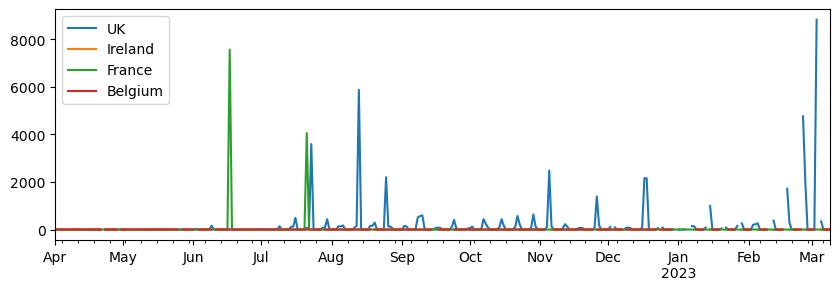

In [31]:
df_Rt[df.index>"2022-03-31"].plot()
plt.show()

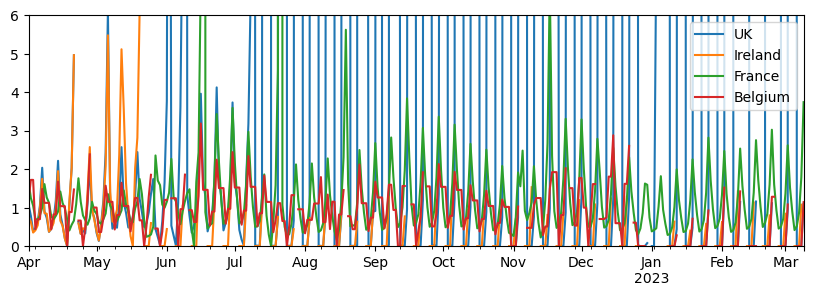

In [32]:
ax_Rt = df_Rt[df.index>"2022-03-31"].plot()
ax_Rt.set_ylim([0,6])
plt.show()

### Correlation between deaths/recoveries and infected cases
I guess the first thing I could try is comparing their respective derivatives/daily differences

In [33]:
infected

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
Albania,0,0,0,0,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
Algeria,0,0,0,0,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
Andorra,0,0,0,0,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
Angola,0,0,0,0,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,...,703228,703228,703228,703228,703228,703228,703228,703228,703228,703228
Winter Olympics 2022,0,0,0,0,0,0,0,0,0,0,...,535,535,535,535,535,535,535,535,535,535
Yemen,0,0,0,0,0,0,0,0,0,0,...,11945,11945,11945,11945,11945,11945,11945,11945,11945,11945


In [34]:
infected.sum(axis = 0)

1/22/20          557
1/23/20          657
1/24/20          944
1/25/20         1437
1/26/20         2120
             ...    
3/5/23     676024901
3/6/23     676082941
3/7/23     676213378
3/8/23     676392824
3/9/23     676570149
Length: 1143, dtype: int64

In [35]:
df_df = pd.DataFrame({ 'infected' : infected.sum(axis = 0).diff(),#.rolling(7).mean(),
                       'recovered' : recovered.sum(axis = 0).diff(),#.rolling(7).mean(),
                       'deaths' : deaths.sum(axis = 0).diff()})#.rolling(7).mean() })
# smoothed it out because without .rolling(7).mean() it was really unreadable
df_df

,infected,recovered,deaths
1/22/20,NaN,NaN,NaN
1/23/20,100.0,2.0,1.0
1/24/20,287.0,7.0,8.0
1/25/20,493.0,3.0,16.0
1/26/20,683.0,14.0,14.0
...,...,...,...
3/5/23,56126.0,0.0,148.0
3/6/23,58040.0,0.0,366.0
3/7/23,130437.0,0.0,923.0
3/8/23,179446.0,0.0,1445.0


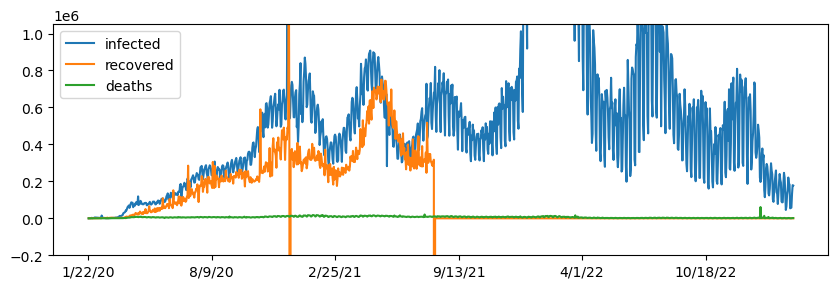

In [36]:
ax_df = df_df.plot()
ax_df.set_ylim([-200000, 1050000])
plt.show()

Looking at until a bit before September 13 2021 we can see the number of recoveries has a rather positive  correlation with the number of infections. However, the number becomes too small after that, and the number of deaths is really just too small throughout to really tell any correlation.

Thus, instead of being dumb and trying to actually see the correlation, I should just use the functions of the libraries we have (code literally lifted from 1-4).

In [37]:
# deaths and infected cases
print(np.corrcoef(deaths.sum(axis = 0),infected.sum(axis = 0).fillna(method='pad')))
print(f"Covariance = {np.cov(deaths.sum(axis = 0),infected.sum(axis = 0).fillna(method='pad'))[0,1]}")
print(f"Correlation = {np.corrcoef(deaths.sum(axis = 0),infected.sum(axis = 0).fillna(method='pad'))[0,1]}")

[[1.         0.93976329]
 [0.93976329 1.        ]]
Covariance = 549084365416755.56
Correlation = 0.9397632884933071


That correlation is really close to 1, so I'd say there's a very strong linear relationship. This can be visualized with a scatterplot.

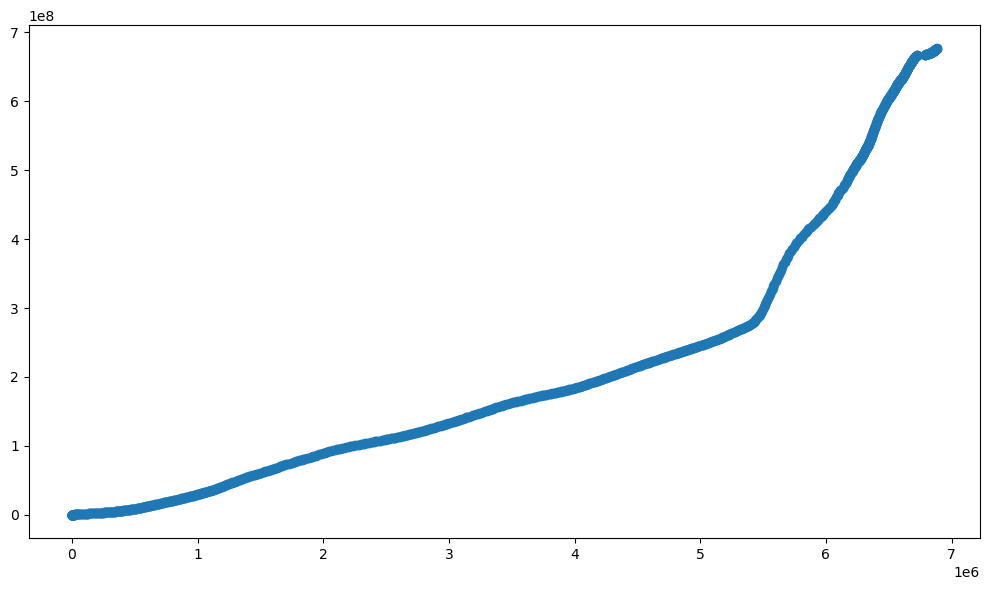

In [38]:
# shamelessly copied from 1-4
plt.figure(figsize=(10,6))
plt.scatter(deaths.sum(axis = 0),infected.sum(axis = 0))
plt.tight_layout()
plt.show()

The plot shows that the # of infections grows with the # of deaths , and around the point of 5.5 on the x-axis the # of infections starts to grow faster while the # of deaths slows.

In [39]:
# recoveries and infected cases
print(np.corrcoef(recovered.sum(axis = 0),infected.sum(axis = 0).fillna(method='pad')))
print(f"Covariance = {np.cov(recovered.sum(axis = 0),infected.sum(axis = 0).fillna(method='pad'))[0,1]}")
print(f"Correlation = {np.corrcoef(recovered.sum(axis = 0),infected.sum(axis = 0).fillna(method='pad'))[0,1]}")

[[ 1.         -0.34982401]
 [-0.34982401  1.        ]]
Covariance = -2976071031366544.5
Correlation = -0.3498240136814474


So the correlation coefficient here is actaully closer to 0 than 1 or -1 which indicates there is a pretty weak linear relationship. This could be because of outliers, or the sudden change, but let's visualize it with a scatterplot to better understand.

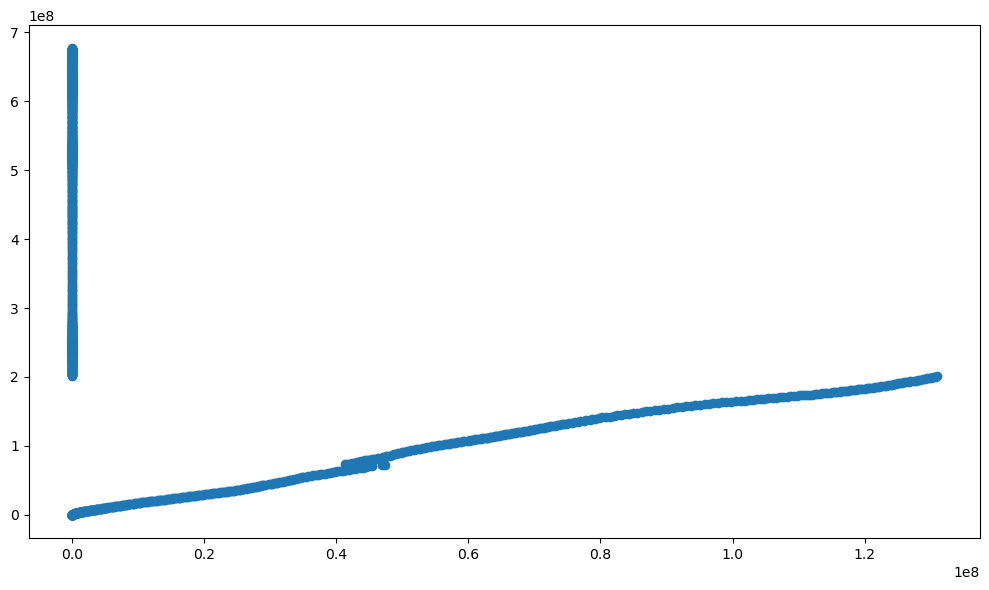

In [40]:
# shamelessly copied from 1-4
plt.figure(figsize=(10,6))
plt.scatter(recovered.sum(axis = 0),infected.sum(axis = 0))
plt.tight_layout()
plt.show()

There certainly seem to be some trends, but there is not clear correlation between recoveries and infections. I just think the data for recovered cases is more incomplete than with the other two categories which is why there is a vertical trend at 0 because at any point in the progression of the disease recoveries will somehow be back at 0. Anyhow, if we ignore that vertical section there is also a trend that the # of infections grows with the # of recoveries with there generally being more recoveries. However, this is not as clear as the deaths vs infections plot because of the 2 trends on it as opposed to just one.

### Typical Disease Length
"visually \[correlate] infection rate and deaths rate and \[look] for some anomalies. You may need to look at different countries to find that out"

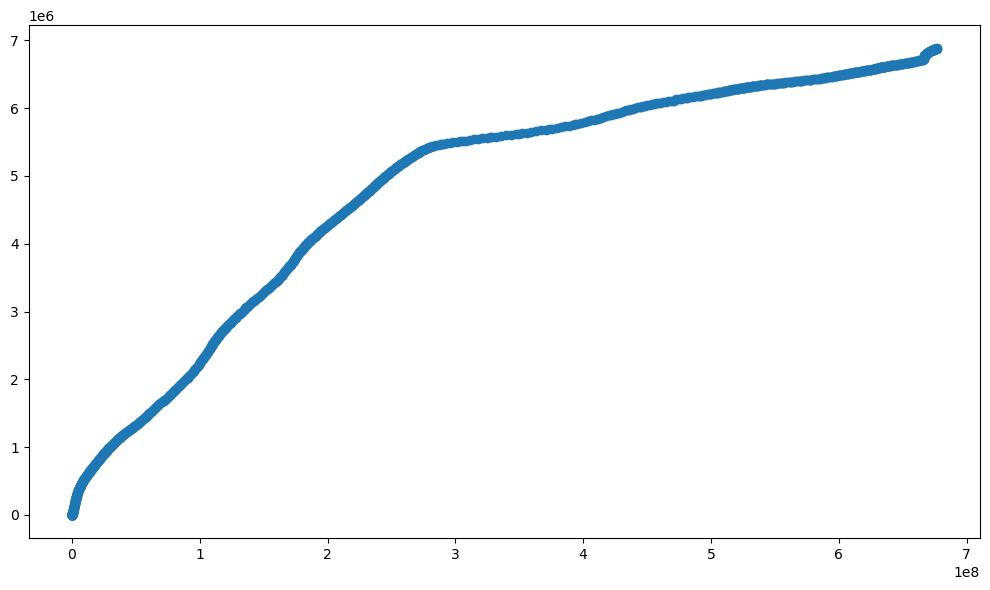

In [41]:
# shamelessly copied from 1-4
plt.figure(figsize=(10,6))
plt.scatter(infected.sum(axis = 0),deaths.sum(axis = 0))
plt.tight_layout()
plt.show()

As opposite of the deaths-infections graph (as it should be), at around 2.5,5.3 the curve flattens. It also becomes a tad more shaky right after that point but then back to normal but less steep.

Yeah I have no idea what I'm looking for I'll just start trying to look through different countries. First, let's make some new dfs with the infection and death info for the countries we want.

In [42]:
# find out what Korea is called in the table
infected.iloc[80:98]

# countries: US, Canada, Algeria, South Korea
# I feel like there's a better way to do this but I'm not going to think about it for now
df_dlInfections = pd.DataFrame({ 'US' : infected.loc['US'],
                       'Canada' : infected.loc['Canada'],
                       'Algeria' : infected.loc['Algeria'],
                       'South Korea' : infected.loc['Korea, South']})
df_dlInfections.index = pd.to_datetime(df_dlInfections.index, format="%m/%d/%y")

df_dlInfections

,US,Canada,Algeria,South Korea
2020-01-22,1,0,0,1
2020-01-23,1,2,0,1
2020-01-24,2,3,0,2
2020-01-25,2,3,0,2
2020-01-26,5,3,0,3
...,...,...,...,...
2023-03-05,103646975,4609751,271477,30569215
2023-03-06,103655539,4611428,271477,30581499
2023-03-07,103690910,4612219,271490,30594297
2023-03-08,103755771,4613054,271494,30605187


In [43]:
# countries: US, Canada, Algeria, South Korea
# I feel like there's a better way to do this but I'm not going to think about it for now
df_dlDeaths = pd.DataFrame({ 'US' : deaths.loc['US'],
                       'Canada' : deaths.loc['Canada'],
                       'Algeria' : deaths.loc['Algeria'],
                       'South Korea' : deaths.loc['Korea, South']})
df_dlDeaths.index = pd.to_datetime(df_dlDeaths.index, format="%m/%d/%y")

df_dlDeaths

,US,Canada,Algeria,South Korea
2020-01-22,0,0,0,0
2020-01-23,0,0,0,0
2020-01-24,0,0,0,0
2020-01-25,0,0,0,0
2020-01-26,0,0,0,0
...,...,...,...,...
2023-03-05,1122134,51555,6881,34034
2023-03-06,1122181,51592,6881,34049
2023-03-07,1122516,51605,6881,34061
2023-03-08,1123246,51634,6881,34081


US


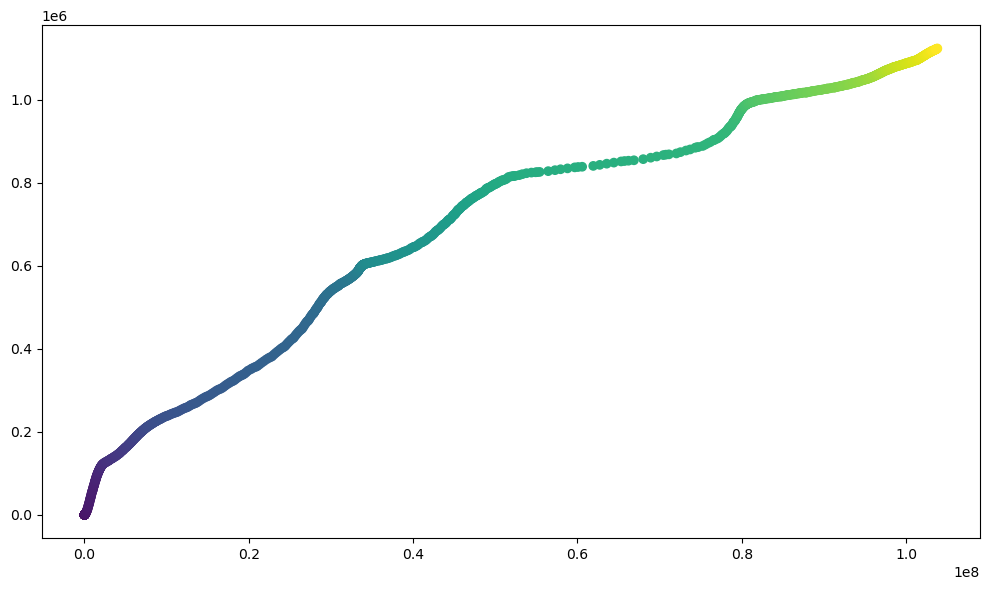

Canada


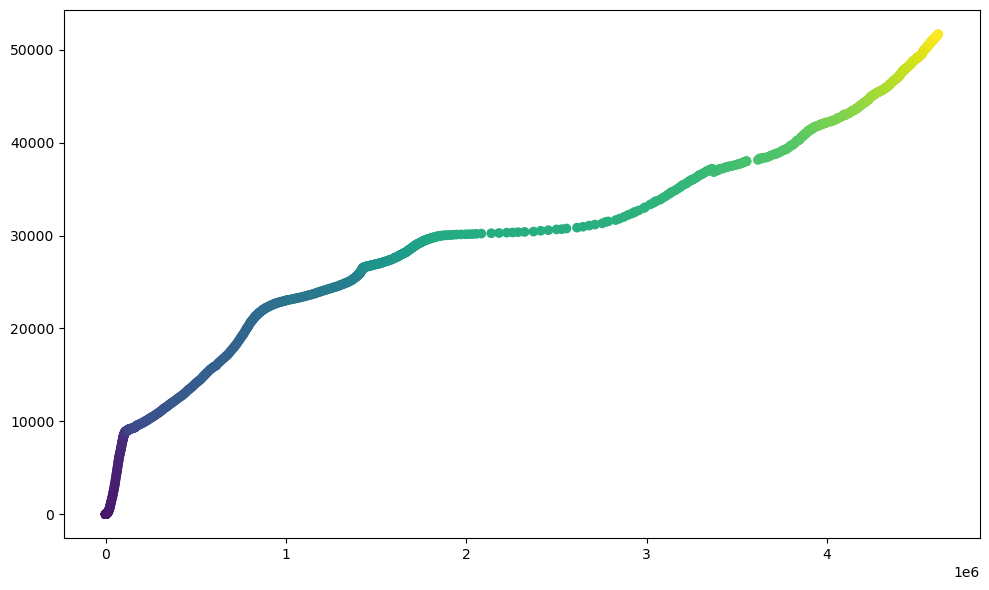

Algeria


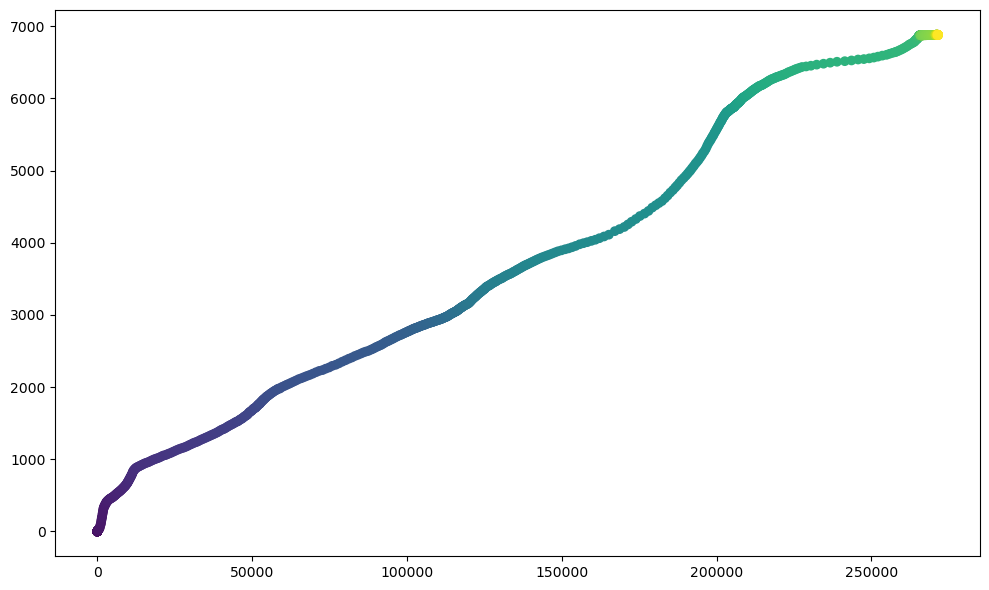

South Korea


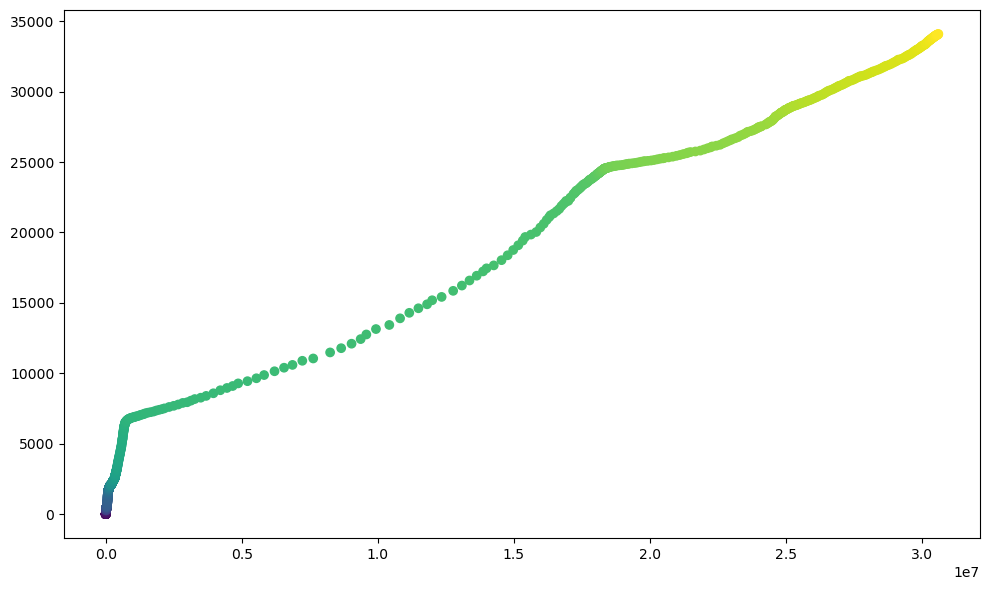

In [44]:
for column in df_dlInfections:
    print(column)
    plt.figure(figsize=(10,6))
    plt.scatter(df_dlInfections[column], df_dlDeaths[column], c = df_dlInfections.index, cmap = "viridis")
    plt.tight_layout()
    plt.show()

So I barely know how to read these but I noticed some anomolies in seemingly different places for each country,

US: 
  - break at around (0.6, 0.8)

CANADA: 
  - stuttering at around (2.1-2.6, 3000) where it kind of plateaus
  - break at around (3.6, 3600)

ALGERIA:
  - nothing too notable

SOUTH KOREA:
  - stuttering from around 0.5-1.3 on the x-axis and 1000-1700 on the y-axis

but! Now that I've added in the colouring based on date, I can clearly see that for each country it is around the solid green or slightly green-blue dates that have anomolies. Now I just have to figure out what colour corresponds to what date.

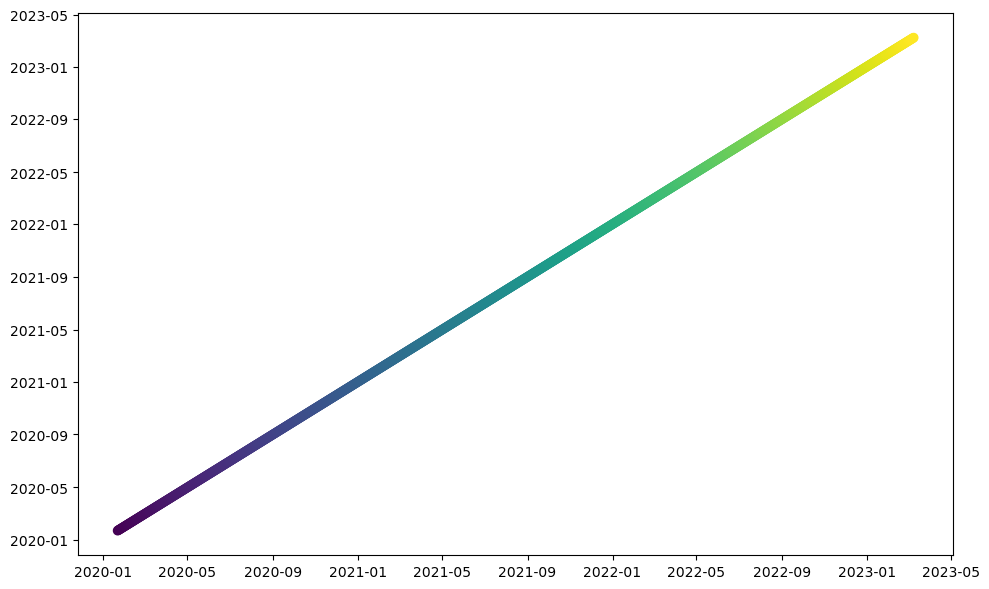

In [45]:
plt.figure(figsize=(10,6))
plt.scatter(df_dlInfections.index, df_dlInfections.index, c = df_dlInfections.index, cmap = "viridis")
plt.tight_layout()
plt.show()

So I know this is nowhere near professional but by eyeballing what colours match up the anomolies for my chosen countries are around 2022-01 to 2022-05. Specifically

USA: 2022-02, CANADA: 2022-02, ALGERIA: 2022-02, SOUTH KOREA: 2022-04

In [46]:
df_dlInfections

,US,Canada,Algeria,South Korea
2020-01-22,1,0,0,1
2020-01-23,1,2,0,1
2020-01-24,2,3,0,2
2020-01-25,2,3,0,2
2020-01-26,5,3,0,3
...,...,...,...,...
2023-03-05,103646975,4609751,271477,30569215
2023-03-06,103655539,4611428,271477,30581499
2023-03-07,103690910,4612219,271490,30594297
2023-03-08,103755771,4613054,271494,30605187


And after checking when they all first got infected (because you get infected before you die of the disease) it's all around the very beginning, and definitely in the first month.

In conclusion, hoping I made the right conclusions and used the right information, the average disease length is 2 years and 1/2 a month.

### Fatality Rate
"Calculate the fatality rate and how it changes over time. You may want to take into account the length of the disease in days to shift one time series before doing calculations"

from [Britannica](https://www.britannica.com/science/case-fatality-rate) "case fatality rate … \[is] the proportion of people who die from a specified disease among all individuals diagnosed with the disease over a certain period of time".

okay so let's calculate it for the first stretch of disease. This stretch will "end" at (bruh why is the next month February) 2/6/22 which is 746 days (hopefully).

In [53]:
infected.sum(axis = 0)[:747]

1/22/20          557
1/23/20          657
1/24/20          944
1/25/20         1437
1/26/20         2120
             ...    
2/2/22     385526232
2/3/22     388720309
2/4/22     391675874
2/5/22     393779507
2/6/22     395542316
Length: 747, dtype: int64

In [54]:
deaths.sum(axis = 0)[:747]

1/22/20         17
1/23/20         18
1/24/20         26
1/25/20         42
1/26/20         56
            ...   
2/2/22     5732521
2/3/22     5744164
2/4/22     5757335
2/5/22     5765553
2/6/22     5771531
Length: 747, dtype: int64

Okay so I'm pretty sure both infected and deaths show the total for infections and total for deaths, not the new amount each day. Thus, to find the fatality rate for this first stretch I just use the last numbers for each and make a ratio?

In [67]:
# fatality rate 1
deaths.sum(axis=0)[746]/infected.sum(axis=0)[746]

0.014591437544194386

**the fatality rate for the first disease length is ~0.015**

the pandemic was over before another complete disease length but we can still use the information until then, even if it will make this whole thing less accurate.

In [63]:
infected.sum(axis = 0)[747:]

2/7/22     398516432
2/8/22     401116122
2/9/22     403549117
2/10/22    406363391
2/11/22    408788228
             ...    
3/5/23     676024901
3/6/23     676082941
3/7/23     676213378
3/8/23     676392824
3/9/23     676570149
Length: 396, dtype: int64

In [64]:
deaths.sum(axis = 0)[747:]

2/7/22     5782632
2/8/22     5795427
2/9/22     5808554
2/10/22    5820436
2/11/22    5832423
            ...   
3/5/23     6877749
3/6/23     6878115
3/7/23     6879038
3/8/23     6880483
3/9/23     6881802
Length: 396, dtype: int64

now before I do the calculations I need to subtract the 2/6/22 numbers from these final numbers because I need to isolate this disease length.

In [66]:
fr_infected2 = infected.sum(axis=0)[-1] - infected.sum(axis=0)[746]
fr_deaths2 = deaths.sum(axis=0)[-1] - deaths.sum(axis=0)[746]

In [69]:
# fatality rate 2
fr_deaths2/fr_infected2

0.003950751027568148

**the fatality rate for the second disease length is ~0.004**

unfortunately, because of the large disease length we only have two points to work with which makes it difficult to truly see a trend. With these two the only thing I can say is *the fatality rate decreases over time*. 

So I highly doubt I did it right.

Anyways what if I want to actually see a trend? So I'm just going to say bye bye to my probably wrongly calculated disease length and calculate monthly fatality rates and plot those.

In [70]:
# except I forgot months are stupid and 
# months have different numbers of days
# PICK UP HERE

## References

You may look at further studies of COVID epidemic spread in the following publications:
* [Sliding SIR Model for Rt Estimation during COVID Pandemic](https://soshnikov.com/science/sliding-sir-model-for-rt-estimation/), blog post by [Dmitry Soshnikov](http://soshnikov.com)
* T.Petrova, D.Soshnikov, A.Grunin. [Estimation of Time-Dependent Reproduction Number for Global COVID-19 Outbreak](https://www.preprints.org/manuscript/202006.0289/v1). *Preprints* **2020**, 2020060289 (doi: 10.20944/preprints202006.0289.v1)
* [Code for the above paper on GitHub](https://github.com/shwars/SlidingSIR)